In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('D:\project\JOB\Customers.csv')
products = pd.read_csv('D:\project\JOB\Products.csv')
transactions = pd.read_csv('D:\project\JOB\Transactions.csv')

print(customers.head(10))
print(products.head(10))
print(transactions.head(10))


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
5      C0006     Brittany Palmer  South America  2024-01-07
6      C0007         Paul Graves           Asia  2022-06-18
7      C0008            David Li  North America  2024-01-13
8      C0009           Joy Clark         Europe  2023-08-14
9      C0010           Aaron Cox         Europe  2022-12-15
  ProductID                  ProductName     Category   Price
0      P001         ActiveWear Biography        Books  169.30
1      P002        ActiveWear Smartwatch  Electronics  346.30
2      P003      ComfortLiving Biography        Books   44.12
3      P004                BookWorld Rug   Home Decor   95.69
4      P005              TechP

In [2]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


print(customers.info())
print(products.info())
print(transactions.info())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    obje

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


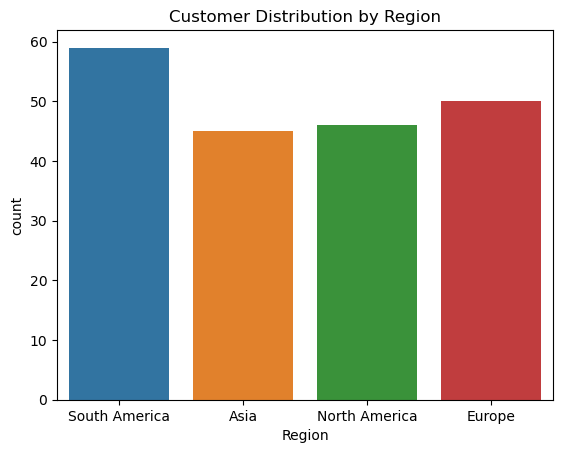

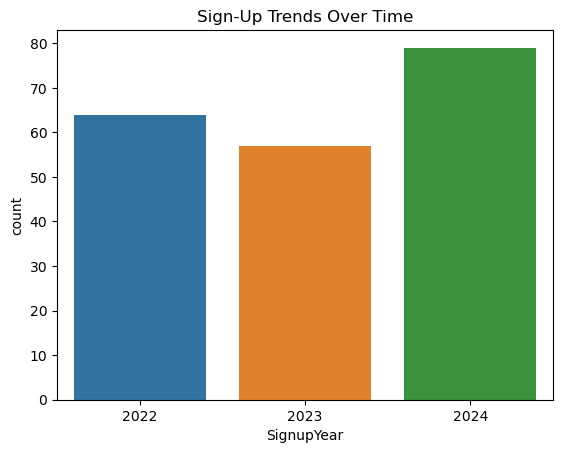

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


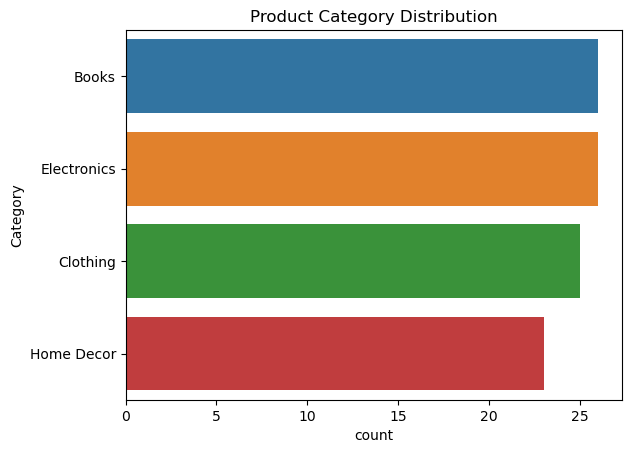

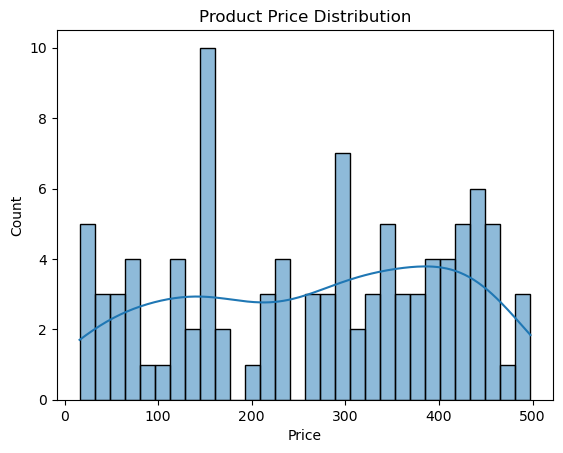

ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


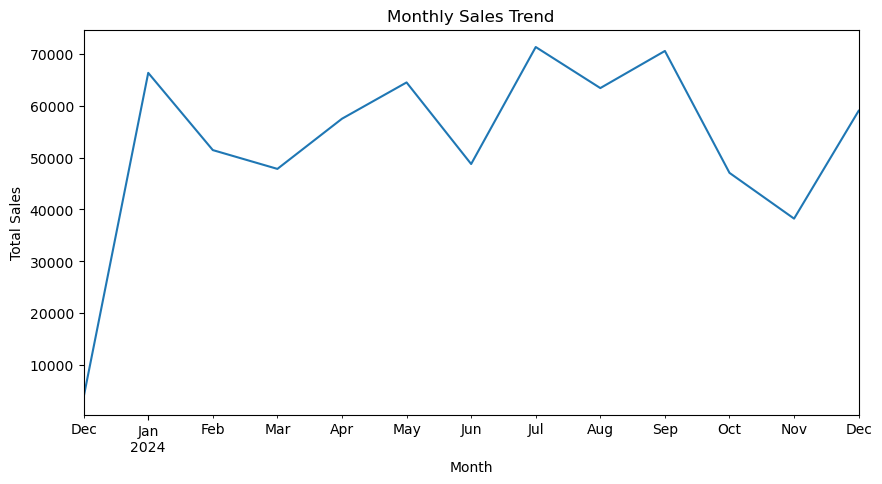

In [4]:
print(customers['Region'].value_counts())
sns.countplot(data=customers, x='Region')
plt.title("Customer Distribution by Region")
plt.show()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.countplot(data=customers, x='SignupYear')
plt.title("Sign-Up Trends Over Time")
plt.show()

print(products['Category'].value_counts())
sns.countplot(data=products, y='Category', order=products['Category'].value_counts().index)
plt.title("Product Category Distribution")
plt.show()

sns.histplot(products['Price'], kde=True, bins=30)
plt.title("Product Price Distribution")
plt.show()

sales_by_product = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_product.head(10))
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [8]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

merged_data = pd.merge(merged_data, products, on='ProductID')

print(merged_data.head(15))


   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0         T00001      C0199      P067  2024-08-25 12:38:23         1   
1         T00112      C0146      P067  2024-05-27 22:23:54         1   
2         T00166      C0127      P067  2024-04-25 07:38:55         1   
3         T00272      C0087      P067  2024-03-26 22:55:37         2   
4         T00363      C0070      P067  2024-03-21 15:10:10         3   
5         T00442      C0188      P067  2024-12-26 14:40:03         1   
6         T00490      C0195      P067  2024-11-24 11:49:48         3   
7         T00536      C0008      P067  2024-09-22 06:13:59         1   
8         T00564      C0157      P067  2024-12-07 17:57:40         3   
9         T00631      C0130      P067  2024-05-14 23:14:59         2   
10        T00727      C0051      P067  2024-01-20 04:52:14         3   
11        T00729      C0075      P067  2024-10-07 06:38:36         2   
12        T00797      C0155      P067  2024-10-04 20:42:53      

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


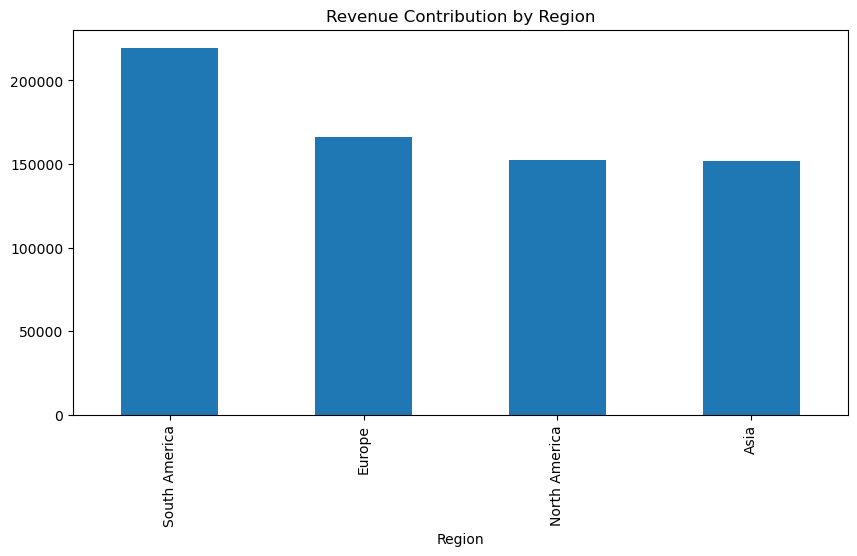

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


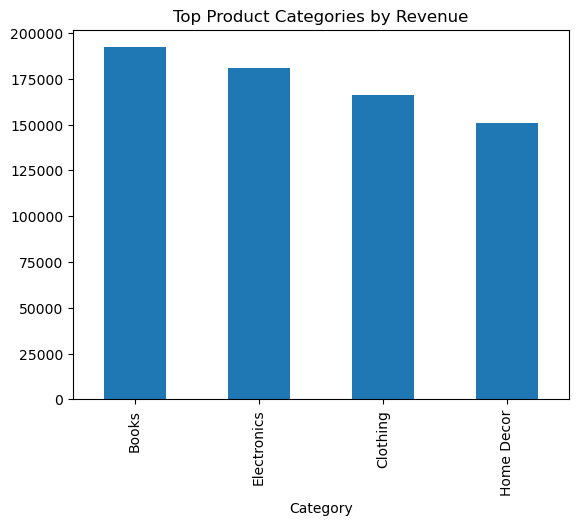

Repeat Customers: 187


In [6]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_region)
revenue_by_region.plot(kind='bar', title='Revenue Contribution by Region', figsize=(10, 5))
plt.show()

category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue.head(5))
category_revenue.head(5).plot(kind='bar', title='Top Product Categories by Revenue')
plt.show()

repeat_customers = merged_data.groupby('CustomerID')['TransactionID'].count()
print(f"Repeat Customers: {sum(repeat_customers > 1)}")


